In [276]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error



In [277]:
df = pd.read_csv("complete.csv",encoding='ISO-8859-1' )

Columns (1,6,8,10,11,13,14,15,16,17,18,22,23,41,42,43,44,56,181,182,184,185,186,187,188,189,190,191) have mixed types.Specify dtype option on import or set low_memory=False.


In [278]:
#df.describe()

In [279]:
#drop the features that are not going to use or that have no data in them
#add some of this back in!
 
df = df.drop(['th232_pb204','th232_u238','u238_pb204','mgco3','epsilon_hf','epsilon_nd','epsilon_sr','rb87_sr87','re187_os186','density','protolith','rock_name','qap_name','sia_scheme','frost_class1','frost_class2','frost_class3', 'facies', 'texture', 'time_period', 'age_method', 'rock_type', 'rock_group', 'rock_origin', 'rock_facies','age_min','material','age_max', 'age_sd','latitude','longitude','comments','density_model','time_period_min','time_period_max','country','loc_prec', 'qgis_geom','sample_description','datum','depth','data_source', 'bibtex', 'doi', 'year', 'journal', 'title', 'author', 'method', 'sample_id', 'sample_name'], axis=1)

In [280]:
#Pm not included because no entries in there

df['rare_earth'] = df['sc_ppm']+df['y_ppm']+df['la_ppm']+df['ce_ppm']+df['pr_ppm']+df['nd_ppm']+df['sm_ppm']+df['eu_ppm']+df['gd_ppm']+df['tb_ppm']+df['dy_ppm']+df['ho_ppm']+df['er_ppm']+ df['tm_ppm']+df['yb_ppm']+df['lu_ppm']

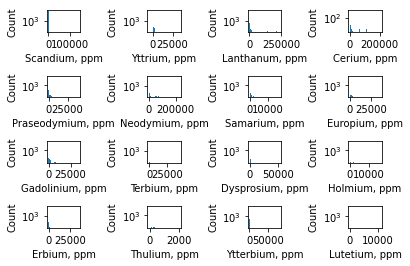

In [294]:
#histogram of rare earth metals

plt.subplots_adjust(hspace=2, wspace=2)

plt.subplot(4, 4, 1)  
plt.hist(x=df['sc_ppm'], log=True, bins = 1000)
plt.xlabel("Scandium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 2)  
plt.hist(x=df['y_ppm'], log=True, bins = 1000)
plt.xlabel("Yttrium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 3)  
plt.hist(x=df['la_ppm'], log=True, bins = 1000)
plt.xlabel("Lanthanum, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 4)  
plt.hist(x=df['c_ppm'], log=True, bins = 1000)
plt.xlabel("Cerium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 5)  
plt.hist(x=df['pr_ppm'], log=True, bins = 1000)
plt.xlabel("Praseodymium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 6)  
plt.hist(x=df['nd_ppm'], log=True, bins = 1000)
plt.xlabel("Neodymium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 7)  
plt.hist(x=df['sm_ppm'], log=True, bins = 1000)
plt.xlabel("Samarium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 8)  
plt.hist(x=df['eu_ppm'], log=True, bins = 1000)
plt.xlabel("Europium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 9) 
plt.hist(x=df['gd_ppm'], log=True, bins = 1000)
plt.xlabel("Gadolinium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 10)  
plt.hist(x=df['tb_ppm'], log=True, bins = 1000)
plt.xlabel("Terbium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 11)  
plt.hist(x=df['dy_ppm'], log=True, bins = 1000)
plt.xlabel("Dysprosium, ppm")
plt.ylabel("Count")

plt.subplot(4,4,12)  
plt.hist(x=df['ho_ppm'], log=True, bins = 1000)
plt.xlabel("Holmium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 13)  
plt.hist(x=df['er_ppm'], log=True, bins = 1000)
plt.xlabel("Erbium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 14)  
plt.hist(x=df['tm_ppm'], log=True, bins = 1000)
plt.xlabel("Thulium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 15) 
plt.hist(x=df['yb_ppm'], log=True, bins = 1000)
plt.xlabel("Ytterbium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 16)  
plt.hist(x=df['lu_ppm'], log=True, bins = 1000)
plt.xlabel("Lutetium, ppm")
plt.ylabel("Count")

plt.show()




In [262]:
df = df.drop(['sc_ppm', 'y_ppm', 'la_ppm', 'ce_ppm', 'pr_ppm', 'nd_ppm', 'pm_ppm', 'sm_ppm', 'eu_ppm', 'gd_ppm', 'tb_ppm', 'dy_ppm', 'ho_ppm', 'er_ppm', 'tm_ppm', 'yb_ppm', 'lu_ppm'], axis=1)

In [263]:
df['rare_earth'].describe()

count    100321.000000
mean        240.500869
std        1996.387965
min         -10.020000
25%         102.523333
50%         148.360000
75%         232.190000
max      275338.900000
Name: rare_earth, dtype: float64

In [264]:

#create a new dataframe and only keep the data that has values in it for rare earth

dfr = df.dropna(subset = ['rare_earth'])
dfr.describe()


,quartz,feldspar,lithics,p_velocity,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rb87_sr86,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,fe_ppm,ga_ppm,ge_ppm,hf_ppm,hg_ppm,in_ppm,ir_ppm,k_ppm,li_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,se_ppm,si_ppm,sn_ppm,sr_ppm,ta_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,w_ppm,v_ppm,u_ppm,zn_ppm,zr_ppm,rare_earth
count,3213.000000,3213.000000,3213.000000,93973.000000,83971.000000,8.650900e+04,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,38435.000000,93905.000000,93905.000000,93783.000000,93747.000000,93906.000000,93757.000000,93726.000000,93783.000000,93412.000000,92382.000000,95072.000000,5077.000000,14416.000000,15487.000000,6718.000000,744.000000,2288.000000,488.000000,804.000000,8100.000000,8037.000000,8054.000000,94101.000000,94554.000000,94665.000000,6171.000000,33071.000000,38794.000000,21962.000000,19161.000000,94572.000000,94550.000000,94271.000000,1408.000000,94130.000000,94303.000000,345.000000,93608.000000,3203.000000,4476.000000,495.000000,8708.000000,1910.000000,488.000000,42.000000,66583.000000,9697.000000,9974.000000,349.000000,27.000000,0.0,1243.000000,4.000000,9.712000e+03,13812.000000,7769.000000,15274.000000,6.742000e+03,4.339000e+03,8452.000000,97726.000000,18862.000000,16117.000000,8122.000000,8920.000000,79052.000000,88028.000000,67534.000000,7.372300e+04,11640.000000,66111.000000,7362.000000,93240.000000,1883.000000,5299.000000,2057.000000,9464.000000,27665.000000,13702.000000,12483.000000,27286.000000,6686.000000,9.364100e+04,98770.000000,1715.000000,1.900000e+01,84475.000000,9.133000e+03,2.707000e+03,97459.000000,1676.000000,1399.000000,1631.000000,11926.000000,9.178000e+03,9.000000,16529.000000,98941.000000,89800.000000,8800.000000,97911.000000,17093.000000,14144.000000,15006.000000,92192.000000,93641.000000,73418.000000,98712.000000,100321.000000
mean,73.487796,12.546787,13.965418,6.860907,1.260228,4.556767e-04,6600.415536,73852.938856,353731.974073,317068.550652,394837.167951,20.018800,36488.267262,1646.829358,97.418846,1401.820875,0.527691,0.631896,-2.542194,1.032059,0.294187,44.230077,78.892047,-0.181321,0.134814,1.983984,1.390698,2.953033,0.709076,0.512611,0.135630,0.015568,0.282927,38.470402,0.425141,19.837688,16.511160,40.940165,54.979339,1.195925,14.111753,0.130123,6.183067,9.510092,6.521534,7.738179,6.348922,7.024298,0.184115,0.100588,1.857740,2.932699,0.079058,0.315731,1.881747,0.956017,1.317477,1.844275,5.474576,0.113547,45.033095,2.582700,324.228391,343.936243,3.229198,0.557405,NaN,8792.657537,0.542500,1.663315e+03,2021.211204,20117.961064,115.421960,1.239208e+04,4.475215e+04,13.045418,541.363817,3.444014,0.294086,20959.220711,0.473414,39.126408,302.646802,3.022751,1.039518e+03,59677.498772,19.588254,1.856680,4.453274,173.461289,0.043682,263.719134,9807.518097,20.671136,7804.933568,1693.708571,1.312224,1303.875747,7.223785e+02,21.673095,1156.742339,1.283332e-04,15.430935,4.597730e+02,2.421425e+03,59.258252,2675.069261,489.426401,844.623141,-0.174111,8.158225e+02,2.975556,3.126938,428.833302,1.607647,5.318623,10.036860,4561.623440,0.532221,16.766778,180.410689,2.256222,99.620978,173.591503,240.500869
std,21.844569,9.268780,22.270680,0.554018,3.353875,2.251267e-03,5826.267380,18925.186794,184932.666470,193946.023670,187792.498172,15.164559,10551.783948,1660.985215,66.945045,1140.593722,0.174825,0.165647,7.717868,8.955143,0

Text(0, 0.5, 'Count')

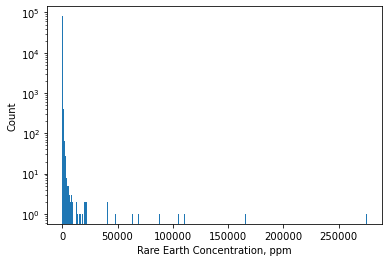

In [265]:
#histogram of rare earth metals
plt.hist(x=dfr['rare_earth'], log=True, bins = 1000)
plt.xlabel("Rare Earth Concentration, ppm")
plt.ylabel("Count")

#quite a few zero entries

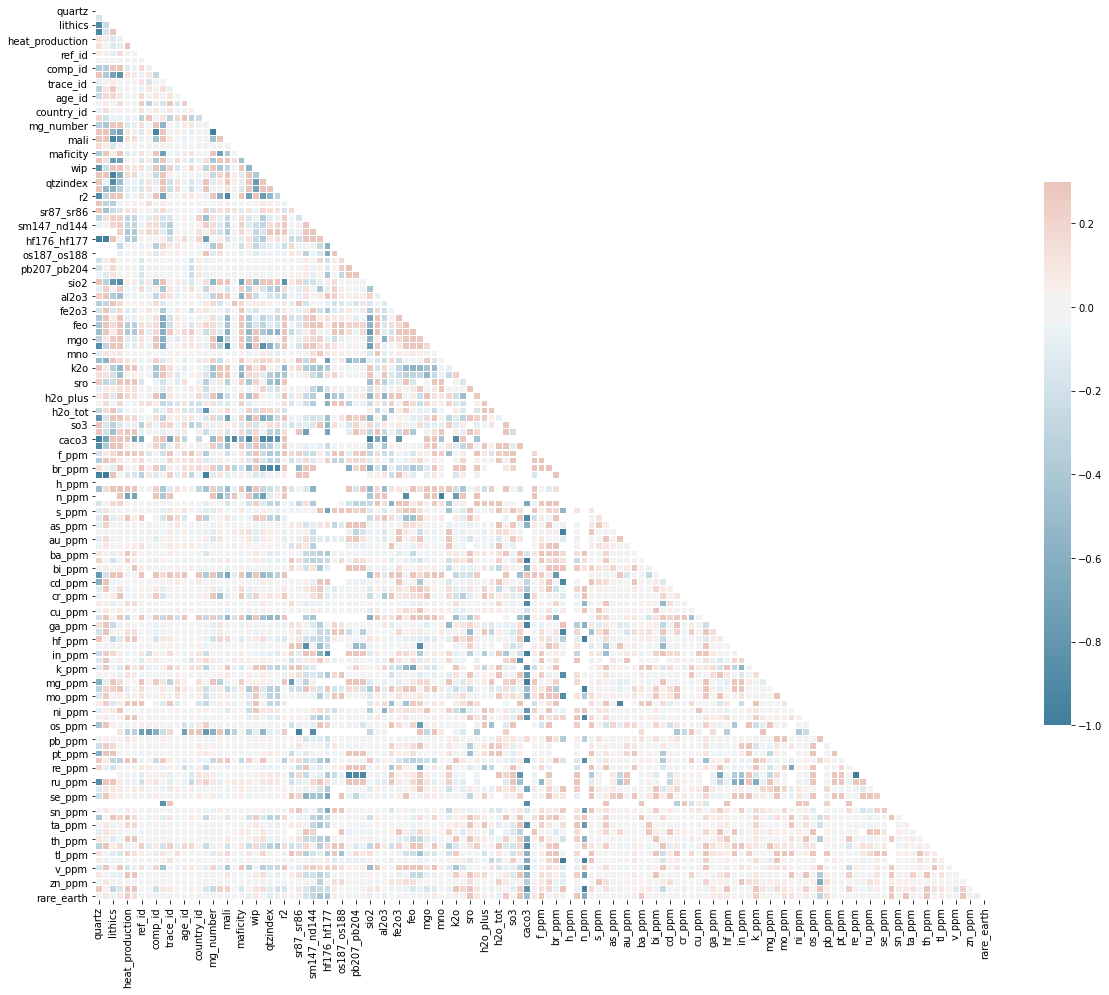

In [266]:
# Compute the correlation matrix
corr = dfr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [267]:
# Generate our categorical variable lists
df_cat = dfr.dtypes[df.dtypes =="object"].index.tolist()
df_cat

[]

In [268]:
# Split our preprocessed data into our features and target arrays for regression problems
y = dfr["rare_earth"]
X = dfr.drop(["rare_earth"], axis = 1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [269]:
X_train.describe()

,quartz,feldspar,lithics,p_velocity,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rb87_sr86,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,fe_ppm,ga_ppm,ge_ppm,hf_ppm,hg_ppm,in_ppm,ir_ppm,k_ppm,li_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,se_ppm,si_ppm,sn_ppm,sr_ppm,ta_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,w_ppm,v_ppm,u_ppm,zn_ppm,zr_ppm
count,2415.000000,2415.000000,2415.000000,70498.000000,63028.000000,6.496200e+04,75240.000000,75240.000000,75240.000000,75240.000000,75240.000000,75240.000000,75240.000000,75240.000000,75240.000000,28854.000000,70438.000000,70438.000000,70342.000000,70312.000000,70438.000000,70319.000000,70307.000000,70342.000000,70076.000000,69287.000000,71321.000000,3832.000000,10774.000000,11590.000000,5082.000000,564.000000,1718.000000,360.000000,608.000000,6029.00000,5982.000000,5993.000000,70586.000000,70914.000000,70990.000000,4650.000000,24853.00000,29120.000000,16444.000000,14331.000000,70930.000000,70905.000000,70715.000000,1038.000000,70600.000000,70726.000000,259.000000,70222.000000,2393.000000,3363.000000,371.000000,6445.000000,1425.000000,369.000000,34.000000,49986.000000,7224.000000,7438.000000,249.000000,22.000000,0.0,919.000000,2.000000,7.315000e+03,10349.000000,5846.000000,11457.000000,5.031000e+03,3.248000e+03,6350.000000,73287.000000,14107.000000,12124.000000,6117.000000,6713.000000,59275.000000,65970.000000,50658.000000,5.528200e+04,8772.000000,49532.000000,5477.000000,69932.000000,1397.000000,3958.000000,1534.000000,7123.000000,20773.000000,10226.000000,9397.000000,20483.000000,5020.000000,7.027300e+04,74070.000000,1288.000000,1.500000e+01,63266.000000,6.858000e+03,2.036000e+03,73116.000000,1255.000000,1054.000000,1223.000000,8969.000000,6.891000e+03,7.000000,12388.000000,74220.000000,67338.000000,6602.000000,73456.000000,12820.000000,10645.000000,11233.000000,69137.000000,70282.000000,55050.000000,74028.000000
mean,73.228539,12.459397,14.312065,6.861617,1.264793,4.593815e-04,6607.137135,73860.692650,353847.358666,316892.642358,395063.914062,20.014660,36503.318009,1651.343155,97.345760,1406.685233,0.527980,0.631678,-2.551152,1.015812,0.294919,44.223313,78.850494,-0.181390,0.134992,1.985252,1.391564,2.237184,0.708962,0.512610,0.136373,0.015206,0.282924,29.373130,0.290953,19.84886,16.530205,40.991373,54.965777,1.200071,14.108417,0.122960,6.16779,9.535900,6.526613,7.733239,6.367129,7.021972,0.183249,0.101182,1.850168,2.931119,0.078996,0.316718,1.895700,0.943394,1.409313,1.881443,5.656240,0.104833,44.849706,2.579144,319.002515,357.094180,2.989920,0.693179,NaN,9067.873564,0.565000,1.918290e+03,1978.038285,20095.376350,117.828998,1.057323e+04,4.090966e+04,15.795337,543.263438,3.394286,0.330105,21565.025980,0.501479,39.431334,306.124834,3.033185,6.452512e+02,59904.079002,19.588215,1.866436,4.468886,88.345227,0.044758,311.374973,9704.862309,20.449914,7898.009550,1741.102647,1.395208,1299.861179,5.405703e+02,21.845967,1378.391336,1.147121e-04,15.316327,5.487994e+02,2.878132e+03,58.769726,2809.347471,571.441112,956.756550,-0.090483,5.630527e+02,2.864286,3.220518,426.785469,1.603281,5.445544,10.802581,4587.981386,0.527534,16.260709,180.784006,2.398015,99.960677,174.375280
std,22.045637,9.131875,22.572813,0.554075,3.610943,2.550873e-03,5828.123084,18941.664092,184731.216367,193906.902672,187554.656193,15.172483,10519.951351,1662.250200,66.946559,1143.418840,0.174525,0.165518,7.694261,8.200461,0.223957,11.167065,22.055840,0.129285,0.085328,0.851869

In [270]:
#use decision tree to see if that improves and look at shap plot to determine relative importance of parameters

import xgboost as xg 
model = xg.XGBRegressor(objective = 'reg:squarederror', n_estimators = 10, max_depth=3, use_label_encoder=False)


model.fit(X_train, y_train)
preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))



RMSE: 1082.245242


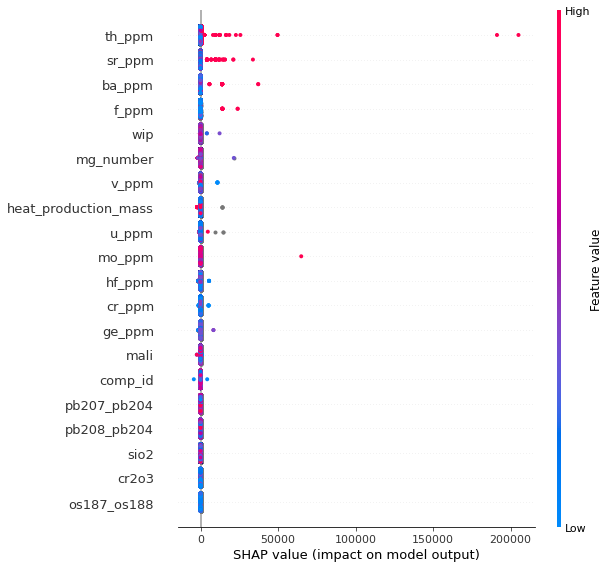

In [271]:
#look at feature importance

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [272]:
#classifer - make 1 and 2 for rare earth column 

df_class=dfr
mask2 = df_class['rare_earth'] < 5
df_class.loc[mask2, 'rare_earth'] = 0
mask = df_class['rare_earth'] > 5
df_class.loc[mask, 'rare_earth'] = 1

df_class['rare_earth'].describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    100321.000000
mean          0.998176
std           0.042671
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: rare_earth, dtype: float64

In [273]:
# Split our preprocessed data into our features and target arrays for regression problems
y_class = df_class["rare_earth"]
X_class = df_class.drop(["rare_earth"], axis = 1)


# Split the preprocessed data into a training and testing dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, random_state=78)

In [274]:
#use decision tree to see if that improves and look at shap plot to determine relative importance of parameters


model_class = xg.XGBClassifier(n_estimators = 50, max_depth=5, use_label_encoder=False)


model_class.fit(X_train_class, y_train_class)
preds = model.predict(X_test_class)

rmse = np.sqrt(mean_squared_error(y_test_class, preds))
print("RMSE: %f" % (rmse))

[07:22:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RMSE: 1373.579810


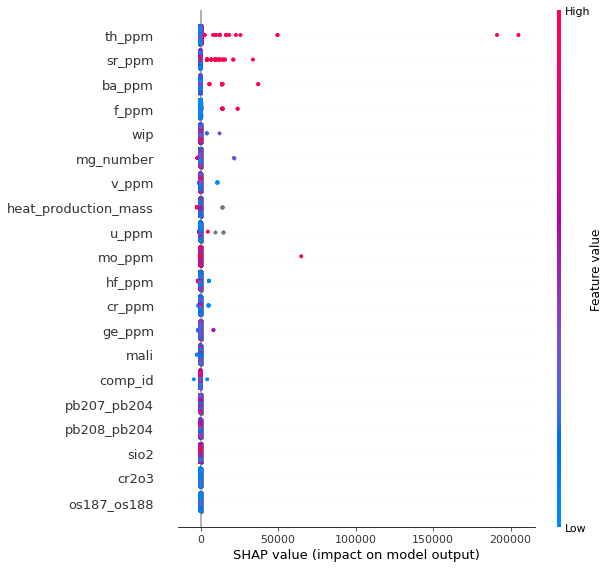

In [275]:
#look at feature importance

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)